# <font color='#e72f2f'> TEXT MINING- Elon Musk tweets

## <font color='#5120e2'> Problem Statement

### <font color='#a522e5'> For Text Mining assignment Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

### Step 1: Sentiment Analysis on Elon Musk's Tweets

In [1]:
### Import the required libraries:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import ngrams

In [2]:
### Load the Elon Musk tweets data from the CSV file:
data = pd.read_csv('Elon_musk.csv',encoding='latin')
data.head(10)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [4]:
tweets=data['Text']
tweets

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [5]:
### removing URLs, mentions, and special characters:
data['Tweet'] = data['Text'].str.replace('http\S+|www.\S+|@\S+', '', regex=True)
data['Tweet'] = data['Text'].str.replace('[^a-zA-Z\s]', '', regex=True)


In [6]:
data.head()

,Unnamed: 0,Text,Tweet
0,1,@kunalb11 Im an alien,kunalb Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,3,@joerogan @Spotify Great interview!,joerogan Spotify Great interview
3,4,@gtera27 Doge is underestimated,gtera Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China for amazin...


In [7]:
### Convert the 'Tweet' column to lowercase:
data['Tweet'] = data['Tweet'].str.lower()
data.head()

,Unnamed: 0,Text,Tweet
0,1,@kunalb11 Im an alien,kunalb im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...


In [8]:
### Remove leading and trailing whitespaces:

data['Tweet'] = data['Tweet'].str.strip()
data['Tweet']

0                                      kunalb im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                            gtera doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997               ppathole altho dumb and dumber is ufuf
1998                               progress update august
Name: Tweet, Length: 1999, dtype: object

In [9]:
### Remove duplicate rows:
data[data.duplicated()]

,Unnamed: 0,Text,Tweet


In [10]:
data.head()

,Unnamed: 0,Text,Tweet
0,1,@kunalb11 Im an alien,kunalb im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...


In [11]:
### Load the custom stopwords from the text file:
with open('stop.txt', 'r') as file:
    custom_stopwords = file.read().splitlines()

In [12]:
### Modify the preprocessing step to include the custom stopwords:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Combine the custom stopwords with the NLTK stopwords
all_stopwords = set(stopwords.words('english')).union(custom_stopwords)

# Define lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess tweet text and remove stopwords
data['Cleaned Tweet'] = data['Tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x) if word.isalpha() and word not in all_stopwords]))


In [13]:
lemmatizer.lemmatize('going')

'going'

In [14]:
### remove emojis 
### Import the re library for regular expressions:
import re

In [15]:
### Modify the preprocessing step to remove emojis:

# Define a regular expression pattern to match emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Preprocess tweet , remove emojis
data['Cleaned Tweet'] = data['Cleaned Tweet'].apply(lambda x: emoji_pattern.sub(r'', x))
data.iloc[:,3:]

,Cleaned Tweet
0,kunalb im alien
1,idaacarmack ray tracing cyberpunk hdr nextlevel
2,joerogan spotify great interview
3,gtera doge underestimated
4,teslacn congratulation tesla china amazing exe...
...,...
1994,flcnhvy true sound surreal negative propaganda...
1995,ppathole make read ur term amp condition click...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber ufuf


In [16]:
### Tokenize the cleaned tweet text:
from nltk.tokenize import word_tokenize

data['Tokenized Tweet'] = data['Cleaned Tweet'].apply(word_tokenize)
data.head()

,Unnamed: 0,Text,Tweet,Cleaned Tweet,Tokenized Tweet
0,1,@kunalb11 Im an alien,kunalb im an alien,kunalb im alien,"[kunalb, im, alien]"
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,idaacarmack ray tracing cyberpunk hdr nextlevel,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,joerogan spotify great interview,"[joerogan, spotify, great, interview]"
3,4,@gtera27 Doge is underestimated,gtera doge is underestimated,gtera doge underestimated,"[gtera, doge, underestimated]"
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,teslacn congratulation tesla china amazing exe...,"[teslacn, congratulation, tesla, china, amazin..."


In [17]:
### Calculate the frequency of each word:
from nltk.probability import FreqDist

word_freq = FreqDist([word for tweet in data['Tokenized Tweet'] for word in tweet]) 
word_freq

FreqDist({'spacex': 239, 'amp': 218, 'tesla': 170, 'erdayastronaut': 142, 'rt': 127, 'ppathole': 123, 'flcnhvy': 114, 'great': 76, 'teslaownerssv': 73, 'wholemarsblog': 68, ...})

In [18]:
### Display the most common words:
common_words = word_freq.most_common(100)
for word, freq in common_words:
    print(f'{word}: {freq}')

spacex: 239
amp: 218
tesla: 170
erdayastronaut: 142
rt: 127
ppathole: 123
flcnhvy: 114
great: 76
teslaownerssv: 73
wholemarsblog: 68
teslarati: 59
launch: 56
haha: 55
nasaspaceflight: 55
uf: 53
good: 52
year: 48
ufuf: 42
yeah: 41
dragon: 41
make: 41
cleantechnica: 40
day: 38
sn: 38
time: 36
engine: 36
true: 35
kristennetten: 35
nasa: 33
rationaletienne: 33
people: 32
idaacarmack: 31
marcushousegame: 31
starship: 31
car: 31
flight: 31
high: 30
engineersfeed: 30
spacestation: 30
falcon: 29
lot: 29
production: 29
ercxspace: 28
work: 27
crew: 27
evafoxu: 27
model: 26
test: 26
mission: 25
ajtourville: 25
coming: 25
earth: 24
felixschlang: 24
lexfridman: 23
thesheetztweetz: 23
tesmaniancom: 23
space: 22
pretty: 22
tobyliiiiiiiiii: 21
week: 21
austinbarnard: 21
booster: 20
point: 20
rocket: 20
mar: 19
future: 19
landing: 19
neuralink: 19
fsd: 19
tashaark: 19
starlink: 18
back: 18
hard: 18
dont: 18
part: 18
icannotenough: 18
berniesanders: 18
working: 17
engineering: 17
month: 17
im: 16
produc

In [19]:
import re

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+', '', tweet)
    
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove special characters and numbers
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove leading and trailing whitespaces
    tweet = tweet.strip()
    
    return tweet


In [20]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data["Cleaned Tweet"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(df)

      aber  abo  aboard  abort  absence  absolute  absolutely  absorb  \
0        0    0       0      0        0         0           0       0   
1        0    0       0      0        0         0           0       0   
2        0    0       0      0        0         0           0       0   
3        0    0       0      0        0         0           0       0   
4        0    0       0      0        0         0           0       0   
...    ...  ...     ...    ...      ...       ...         ...     ...   
1994     0    0       0      0        0         0           0       0   
1995     0    0       0      0        0         0           0       0   
1996     0    0       0      0        0         0           0       0   
1997     0    0       0      0        0         0           0       0   
1998     0    0       0      0        0         0           0       0   

      absorption  absurd  ...  zero  zikryzamir  zip  zogfotpik  zon  zone  \
0              0       0  ...     0          

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data["Cleaned Tweet"])
print(TFIDF)

  (0, 109)	0.581252452742239
  (0, 2330)	0.47951089824486476
  (0, 2572)	0.6574305169715917
  (1, 3006)	0.42162570869515087
  (1, 1551)	0.4444126856933154
  (1, 827)	0.38267111422102285
  (1, 4299)	0.4444126856933154
  (1, 3452)	0.4444126856933154
  (1, 2314)	0.2885943077968031
  (2, 2425)	0.5043290017718325
  (2, 1484)	0.3080284702583498
  (2, 3931)	0.5704255952716918
  (2, 2496)	0.5704255952716918
  (3, 4418)	0.6108339384056402
  (3, 985)	0.5037497388423235
  (3, 1503)	0.6108339384056402
  (4, 4674)	0.2899525649531393
  (4, 1189)	0.47602462699562004
  (4, 127)	0.37914099125952955
  (4, 599)	0.4098912570978409
  (4, 4152)	0.21261636123964983
  (4, 718)	0.37914099125952955
  (4, 4158)	0.4342991162231642
  (5, 2177)	0.5668236372046388
  (5, 3143)	0.5668236372046388
  :	:
  (1994, 2993)	0.3201323906160036
  (1994, 133)	0.15099379827112358
  (1994, 4330)	0.2297411322649143
  (1994, 1309)	0.17656114708831366
  (1995, 20)	0.4133506932607892
  (1995, 634)	0.4133506932607892
  (1995, 4147)	0.

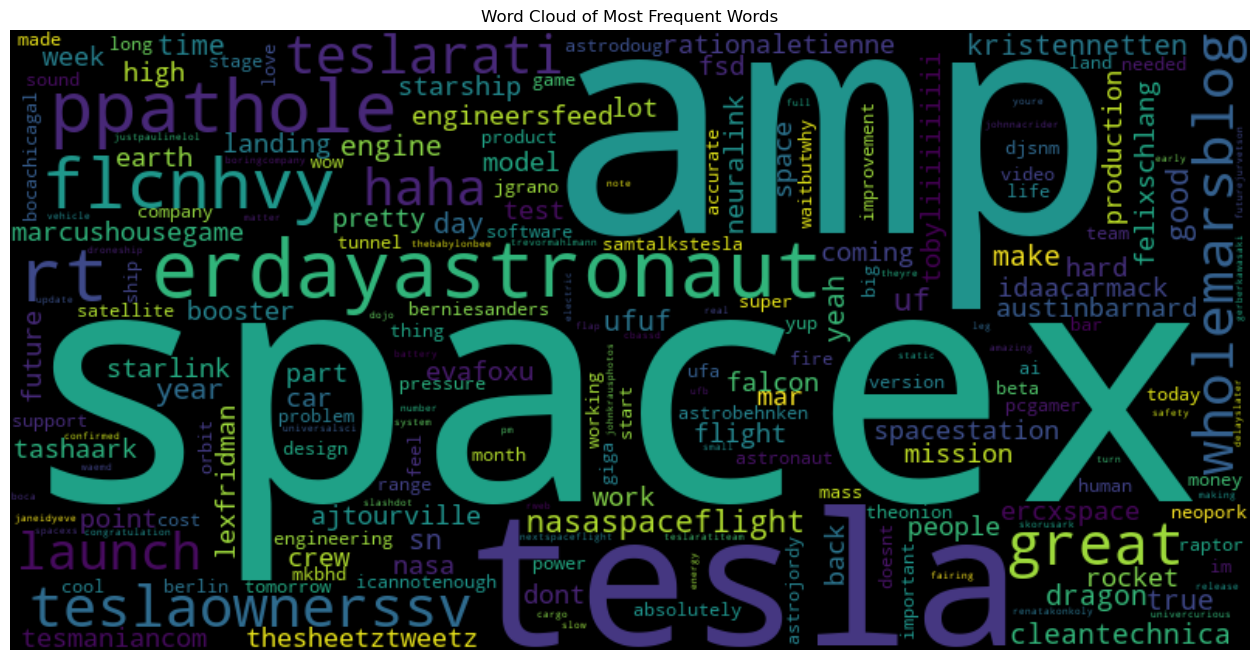

In [22]:
### Plot a word cloud to visualize the most frequent words:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(16, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()


In [23]:
from textblob import TextBlob
data['polarity'] = data["Cleaned Tweet"].apply(lambda x: TextBlob(x).sentiment[0])
data[['Cleaned Tweet','polarity']].head(5)

,Cleaned Tweet,polarity
0,kunalb im alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextlevel,0.00
2,joerogan spotify great interview,0.80
3,gtera doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.60


In [24]:
data[data.polarity>0].head(5)

,Unnamed: 0,Text,Tweet,Cleaned Tweet,Tokenized Tweet,polarity
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,joerogan spotify great interview,"[joerogan, spotify, great, interview]",0.8
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,teslacn congratulation tesla china amazing exe...,"[teslacn, congratulation, tesla, china, amazin...",0.6
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox httpstcowfkmyuoj,happy year ox httpstcowfkmyuoj,"[happy, year, ox, httpstcowfkmyuoj]",0.8
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,owensparks flcnhvy anonyx haha,"[owensparks, flcnhvy, anonyx, haha]",0.2
9,10,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome,"[entertaining, outcome]",0.5


In [25]:
## top category positive posts
data[data.polarity>0].head(5)

,Unnamed: 0,Text,Tweet,Cleaned Tweet,Tokenized Tweet,polarity
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,joerogan spotify great interview,"[joerogan, spotify, great, interview]",0.8
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,teslacn congratulation tesla china amazing exe...,"[teslacn, congratulation, tesla, china, amazin...",0.6
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox httpstcowfkmyuoj,happy year ox httpstcowfkmyuoj,"[happy, year, ox, httpstcowfkmyuoj]",0.8
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,owensparks flcnhvy anonyx haha,"[owensparks, flcnhvy, anonyx, haha]",0.2
9,10,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome,"[entertaining, outcome]",0.5


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1999 non-null   int64  
 1   Text             1999 non-null   object 
 2   Tweet            1999 non-null   object 
 3   Cleaned Tweet    1999 non-null   object 
 4   Tokenized Tweet  1999 non-null   object 
 5   polarity         1999 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 93.8+ KB


In [27]:
data = data.drop(['Tweet'], axis = 1)
data

,Unnamed: 0,Text,Cleaned Tweet,Tokenized Tweet,polarity
0,1,@kunalb11 Im an alien,kunalb im alien,"[kunalb, im, alien]",-0.250000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne...",0.000000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]",0.800000
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"[gtera, doge, underestimated]",0.000000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,"[teslacn, congratulation, tesla, china, amazin...",0.600000
...,...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true sound surreal negative propaganda...,"[flcnhvy, true, sound, surreal, negative, prop...",0.152381
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make read ur term amp condition click...,"[ppathole, make, read, ur, term, amp, conditio...",0.000000
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]",0.000000
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb dumber ufuf,"[ppathole, altho, dumb, dumber, ufuf]",-0.375000


In [28]:
def sent_type(data): 
    for i in (data):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')
            
sent_type(data['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
neutral
negative
neutral
neutral
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral
neut

In [29]:
data["category"]=data['polarity']

data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

data["category"]=data["category"].astype('category')
data.dtypes

Unnamed: 0            int64
Text                 object
Cleaned Tweet        object
Tokenized Tweet      object
polarity            float64
category           category
dtype: object

In [30]:
data.category.value_counts(normalize=True).mul(100)

Negative    68.334167
Positive    31.665833
Name: category, dtype: float64

In [31]:
### topic modeeling
import gensim
from gensim import corpora

In [32]:
### Create a dictionary and document-term matrix:

dictionary = corpora.Dictionary(data['Tokenized Tweet'])
corpus = [dictionary.doc2bow(tweet) for tweet in data['Tokenized Tweet']]

In [33]:
### Apply LDA for topic modeling:
num_topics = 5  # Define the number of topics
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

In [34]:
### Print the identified topics and their keywords:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.013*"tesla" + 0.011*"rt" + 0.011*"spacex" + 0.008*"amp" + 0.008*"great"')
(1, '0.023*"amp" + 0.017*"spacex" + 0.010*"tesla" + 0.010*"erdayastronaut" + 0.008*"ppathole"')
(2, '0.024*"spacex" + 0.019*"erdayastronaut" + 0.013*"amp" + 0.011*"ppathole" + 0.010*"tesla"')
(3, '0.016*"tesla" + 0.010*"teslaownerssv" + 0.009*"idaacarmack" + 0.009*"spacex" + 0.009*"rt"')
(4, '0.012*"flcnhvy" + 0.012*"amp" + 0.010*"uf" + 0.010*"nasaspaceflight" + 0.008*"erdayastronaut"')


In [35]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['Tokenized Tweet'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.4190470652065068


In [36]:
topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]
data['Topic Distribution'] = topic_distribution

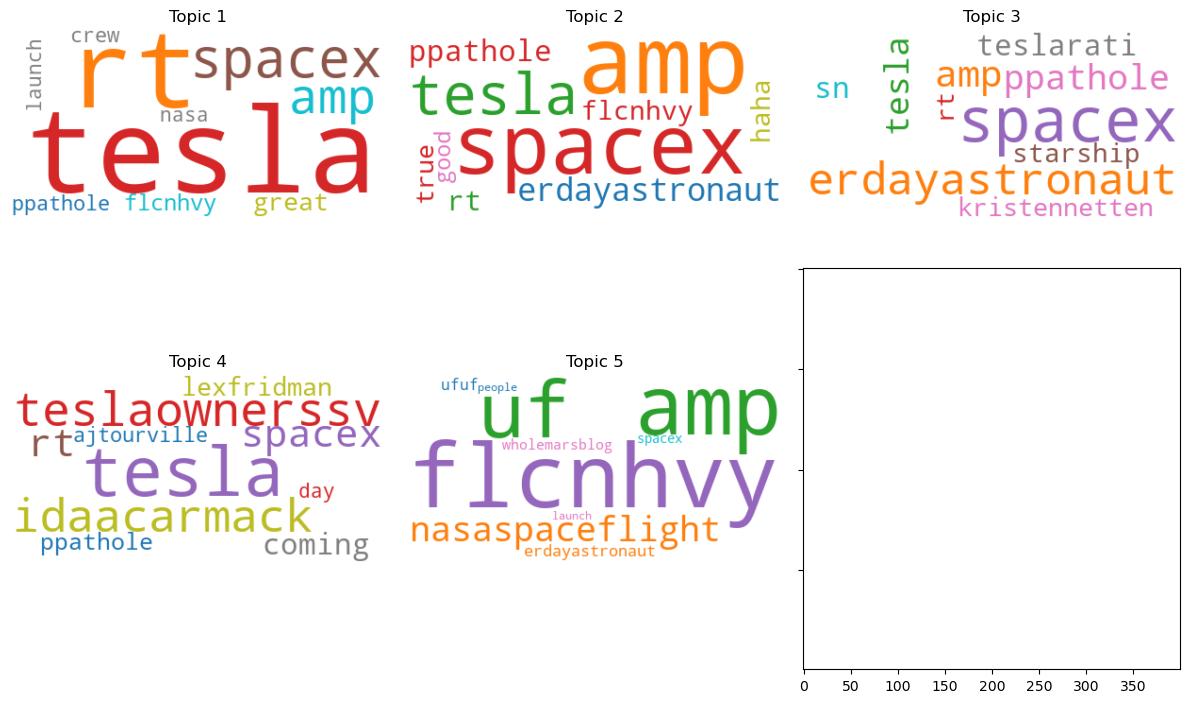

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

for i, (ax, topic) in enumerate(zip(axes.flatten(), topics)):
    topic_words = dict(topic[1])
    wordcloud = WordCloud(background_color='white', colormap='tab10').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [38]:
### Initialize the SentimentIntensityAnalyzer:
sid = SentimentIntensityAnalyzer()

In [39]:
### Define a function to get the sentiment score of each tweet:
def get_sentiment_score(tweet):
    sentiment_score = sid.polarity_scores(tweet)['compound']
    return sentiment_score

In [40]:
### Apply the function to the 'Tweet' column and create a new column 'Sentiment Score':
data['Sentiment Score'] = data['Cleaned Tweet'].apply(get_sentiment_score)
data

,Unnamed: 0,Text,Cleaned Tweet,Tokenized Tweet,polarity,category,Topic Distribution,Sentiment Score
0,1,@kunalb11 Im an alien,kunalb im alien,"[kunalb, im, alien]",-0.250000,Negative,"[(0, 0.050496355), (1, 0.050442386), (2, 0.798...",0.0000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne...",0.000000,Negative,"[(0, 0.028602676), (1, 0.88360023), (2, 0.0285...",0.0000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]",0.800000,Positive,"[(0, 0.8394796), (1, 0.040166244), (2, 0.04019...",0.6249
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"[gtera, doge, underestimated]",0.000000,Negative,"[(0, 0.79405725), (1, 0.050034907), (2, 0.0558...",-0.2732
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,"[teslacn, congratulation, tesla, china, amazin...",0.600000,Positive,"[(0, 0.8975506), (1, 0.025594292), (2, 0.02546...",0.8271
...,...,...,...,...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true sound surreal negative propaganda...,"[flcnhvy, true, sound, surreal, negative, prop...",0.152381,Positive,"[(0, 0.016819194), (1, 0.9326906), (2, 0.01681...",-0.0000
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make read ur term amp condition click...,"[ppathole, make, read, ur, term, amp, conditio...",0.000000,Negative,"[(0, 0.918738), (1, 0.020354904), (2, 0.020422...",0.3818
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]",0.000000,Negative,"[(0, 0.040349904), (1, 0.040437035), (2, 0.040...",0.0000
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb dumber ufuf,"[ppathole, altho, dumb, dumber, ufuf]",-0.375000,Negative,"[(0, 0.033622734), (1, 0.03361451), (2, 0.0337...",-0.7003


In [41]:
### Analyze the sentiment:
positive_tweets = data[data['Sentiment Score'] > 0]
negative_tweets = data[data['Sentiment Score'] < 0]
neutral_tweets = data[data['Sentiment Score'] == 0]

In [42]:
print("Positive Tweets:")
positive_tweets.head()

Positive Tweets:


,Unnamed: 0,Text,Cleaned Tweet,Tokenized Tweet,polarity,category,Topic Distribution,Sentiment Score
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]",0.8,Positive,"[(0, 0.8394796), (1, 0.040166244), (2, 0.04019...",0.6249
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulation tesla china amazing exe...,"[teslacn, congratulation, tesla, china, amazin...",0.6,Positive,"[(0, 0.8975506), (1, 0.025594292), (2, 0.02546...",0.8271
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy year ox httpstcowfkmyuoj,"[happy, year, ox, httpstcowfkmyuoj]",0.8,Positive,"[(0, 0.04059724), (1, 0.041352488), (2, 0.0413...",0.5719
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha,"[owensparks, flcnhvy, anonyx, haha]",0.2,Positive,"[(0, 0.040305186), (1, 0.040743288), (2, 0.040...",0.4588
9,10,The most entertaining outcome is the most likely,entertaining outcome,"[entertaining, outcome]",0.5,Positive,"[(0, 0.06667966), (1, 0.06667925), (2, 0.73328...",0.4404


In [43]:
### print("Negative Tweets:")
negative_tweets.head()

,Unnamed: 0,Text,Cleaned Tweet,Tokenized Tweet,polarity,category,Topic Distribution,Sentiment Score
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"[gtera, doge, underestimated]",0.00,Negative,"[(0, 0.79405725), (1, 0.050034907), (2, 0.0558...",-0.2732
6,7,"Frodo was the underdoge,\nAll thought he would...",frodo underdoge thought fail httpstcozgxjfdzzrm,"[frodo, underdoge, thought, fail, httpstcozgxj...",-0.50,Negative,"[(0, 0.8651509), (1, 0.034197167), (2, 0.03374...",-0.5423
15,16,"@JoshManMode He definitely has issues, but the...",joshmanmode issue sentencing bit high,"[joshmanmode, issue, sentencing, bit, high]",0.16,Positive,"[(0, 0.03369486), (1, 0.033615075), (2, 0.8641...",-0.1531
20,21,@freewalletorg Any crypto wallet that wont gi...,freewalletorg crypto wallet wont give private ...,"[freewalletorg, crypto, wallet, wont, give, pr...",0.00,Negative,"[(0, 0.9192249), (1, 0.020197676), (2, 0.02021...",-0.3400
21,22,@freewalletorg Your app sucks,freewalletorg app suck,"[freewalletorg, app, suck]",0.00,Negative,"[(0, 0.052591924), (1, 0.7962064), (2, 0.05052...",-0.4404


In [44]:
print("Neutral Tweets:")
neutral_tweets.head()

Neutral Tweets:


,Unnamed: 0,Text,Cleaned Tweet,Tokenized Tweet,polarity,category,Topic Distribution,Sentiment Score
0,1,@kunalb11 Im an alien,kunalb im alien,"[kunalb, im, alien]",-0.25,Negative,"[(0, 0.050496355), (1, 0.050442386), (2, 0.798...",0.0
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne...",0.00,Negative,"[(0, 0.028602676), (1, 0.88360023), (2, 0.0285...",0.0
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvy anonyx tweet represent realworld time ...,"[flcnhvy, anonyx, tweet, represent, realworld,...",0.00,Negative,"[(0, 0.025271246), (1, 0.025912201), (2, 0.025...",0.0
10,11,@GiveDirectly Just sent some,givedirectly,[givedirectly],0.00,Negative,"[(0, 0.100067936), (1, 0.100065626), (2, 0.100...",0.0
12,13,https://t.co/3rWE9uHSTS,httpstcorweuhsts,[httpstcorweuhsts],0.00,Negative,"[(0, 0.10007398), (1, 0.10007145), (2, 0.10007...",0.0


In [45]:
print('Postive tweets shape',positive_tweets.shape)
print('Negative tweets shape',negative_tweets.shape)
print('Neutal tweets shape',neutral_tweets.shape)

Postive tweets shape (682, 8)
Negative tweets shape (208, 8)
Neutal tweets shape (1109, 8)


## conclusion:
### By conducting topic modeling and subsequent analysis, we have gained a structured understanding of Elon Musk's tweet topics. These insights can be valuable for understanding his interests, priorities, and the broader discussions surrounding his tweets.